In [1]:
import sys
sys.path.append('../')
import importlib
import model.op
importlib.reload(model.op)
from model.op import number_aircrafts_lp, number_aircrafts_lp_DTLA_charging, number_aircrafts_lp_middle_charging
import numpy as np

## Default parameters in LP

- Timestep: 5 min

- Flight time tau: 2 timesteps

- Kappa: 10% charge, 2 levels of SOC

- Gamma: 16 SOCs


In [2]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 14.92], [15.02, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04], [17.11, 0]], # 24
              [[0, 21.98], [22.60, 0]], # 36
              [[0, 26.52], [26.71, 0]], # 48
              [[0, 30.35], [31.09, 0]], # 60
              [[0, 36.31], [36.40, 0]], # 72
              [[0, 39.58], [40.16, 0]], # 84
              [[0, 44.05], [44.72, 0]], # 96
              [[0, 50.86], [50.71, 0]]] # 108
# gamma = np.array([
# 0.0129,0.0133,0.0137,0.0142,0.0147,
# 0.0153,0.0158,0.0166,0.0172,0.018,
# 0.0188,0.0197,0.0207,0.0219,0.0231,
# 0.0245,0.026,0.0278,0.03,0.0323,
# 0.0351,0.0384,0.0423,0.0472,0.0536,
# 0.0617,0.0726,0.0887,0.1136,0.1582,
# 0.2622,0.9278,
# ])*60

gamma = np.array([
0.5,0.5,0.5,0.5,0.5,
0.5,0.5,0.5,0.5,0.5,
0.5,0.5,0.5,0.5,0.5,
0.5,0.5,0.5,0.5,0.5,
0.5,0.5,0.5,0.5,0.5,
0.5,0.5,0.5,0.5,0.5,
0.5,0.5,
])

for i in range(0, len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_linear_charging'
                        , gamma=gamma,kappa=kappa,tau=tau, variable_cost=0)

Set parameter Username


Academic license - for non-commercial use only - expires 2024-06-20
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 21490 rows, 345708 columns and 707458 nonzeros
Model fingerprint: 0xa27c257d
Variable types: 0 continuous, 345708 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 1876 rows and 2900 columns
Presolve time: 1.44s
Presolved: 19614 rows, 342808 columns, 698940 nonzeros
Variable types: 0 continuous, 342808 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.63s

Barrier statistics:
 AA' NZ     : 3.695e+05
 Factor NZ  : 4.525e+06 (roughly 200 MB of memory

In [2]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 14.92], [15.02, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04], [17.11, 0]], # 24
              [[0, 21.98], [22.60, 0]], # 36
              [[0, 26.52], [26.71, 0]], # 48
              [[0, 30.35], [31.09, 0]], # 60
              [[0, 36.31], [36.40, 0]], # 72
              [[0, 39.58], [40.16, 0]], # 84
              [[0, 44.05], [44.72, 0]], # 96
              [[0, 50.86], [50.71, 0]]] # 108
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60
for i in range(1, len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_zero_penalty'
                        , gamma=gamma,kappa=kappa,tau=tau, variable_cost=0)

Set parameter Username


Academic license - for non-commercial use only - expires 2024-06-20
Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 21560 rows, 346896 columns and 704022 nonzeros
Model fingerprint: 0x8b0f6b67
Variable types: 0 continuous, 346896 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 1918 rows and 7864 columns
Presolve time: 1.25s
Presolved: 19642 rows, 339032 columns, 690434 nonzeros
Variable types: 0 continuous, 339032 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.91s

Barrier statis

In [3]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 14.92], [15.02, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04], [17.11, 0]], # 24
              [[0, 21.98], [22.60, 0]], # 36
              [[0, 26.52], [26.71, 0]], # 48
              [[0, 30.35], [31.09, 0]], # 60
              [[0, 36.31], [36.40, 0]], # 72
              [[0, 39.58], [40.16, 0]], # 84
              [[0, 44.05], [44.72, 0]], # 96
              [[0, 50.86], [50.71, 0]]] # 108
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60
for i in range(1, len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_0.1_penalty'
                        , gamma=gamma,kappa=kappa,tau=tau, variable_cost=0.1)

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 21560 rows, 346896 columns and 704022 nonzeros
Model fingerprint: 0x07129607
Variable types: 0 continuous, 346896 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 1917 rows and 7296 columns
Presolve time: 1.18s
Presolved: 19643 rows, 339600 columns, 691003 nonzeros
Variable types: 0 continuous, 339600 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.79s

Barrier statistics:
 AA' NZ     : 3.638e+05
 Factor NZ  : 7.142e+06 (roughly 200 M

In [4]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 14.92], [15.02, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04], [17.11, 0]], # 24
              [[0, 21.98], [22.60, 0]], # 36
              [[0, 26.52], [26.71, 0]], # 48
              [[0, 30.35], [31.09, 0]], # 60
              [[0, 36.31], [36.40, 0]], # 72
              [[0, 39.58], [40.16, 0]], # 84
              [[0, 44.05], [44.72, 0]], # 96
              [[0, 50.86], [50.71, 0]]] # 108
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60
for i in range(1, len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_0.01_penalty'
                        , gamma=gamma,kappa=kappa,tau=tau, variable_cost=0.01)

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 21560 rows, 346896 columns and 704022 nonzeros
Model fingerprint: 0xca587cd9
Variable types: 0 continuous, 346896 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 1917 rows and 7296 columns
Presolve time: 3.42s
Presolved: 19643 rows, 339600 columns, 691003 nonzeros
Variable types: 0 continuous, 339600 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 2.39s

Barrier statistics:
 AA' NZ     : 3.638e+05
 Factor NZ  : 7.142e+06 (roughly 200 M

In [5]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 14.92], [15.02, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04], [17.11, 0]], # 24
              [[0, 21.98], [22.60, 0]], # 36
              [[0, 26.52], [26.71, 0]], # 48
              [[0, 30.35], [31.09, 0]], # 60
              [[0, 36.31], [36.40, 0]], # 72
              [[0, 39.58], [40.16, 0]], # 84
              [[0, 44.05], [44.72, 0]], # 96
              [[0, 50.86], [50.71, 0]]] # 108
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60
for i in range(1, len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_0.001_penalty'
                        , gamma=gamma,kappa=kappa,tau=tau, variable_cost=0.001)

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 21560 rows, 346896 columns and 704022 nonzeros
Model fingerprint: 0x5d51a426
Variable types: 0 continuous, 346896 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 1917 rows and 7296 columns
Presolve time: 3.45s
Presolved: 19643 rows, 339600 columns, 691003 nonzeros
Variable types: 0 continuous, 339600 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 2.64s

Barrier statistics:
 AA' NZ     : 3.638e+05
 Factor NZ  : 7.142e+06 (roughly 200 M

In [6]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 14.92], [15.02, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04], [17.11, 0]], # 24
              [[0, 21.98], [22.60, 0]], # 36
              [[0, 26.52], [26.71, 0]], # 48
              [[0, 30.35], [31.09, 0]], # 60
              [[0, 36.31], [36.40, 0]], # 72
              [[0, 39.58], [40.16, 0]], # 84
              [[0, 44.05], [44.72, 0]], # 96
              [[0, 50.86], [50.71, 0]]] # 108
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60
for i in range(1, len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_0.0001_penalty'
                        , gamma=gamma,kappa=kappa,tau=tau, variable_cost=0.0001)

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 21560 rows, 346896 columns and 704022 nonzeros
Model fingerprint: 0x16c0c77e
Variable types: 0 continuous, 346896 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-04, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 1917 rows and 7296 columns
Presolve time: 3.17s
Presolved: 19643 rows, 339600 columns, 691003 nonzeros
Variable types: 0 continuous, 339600 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 2.34s

Barrier statistics:
 AA' NZ     : 3.638e+05
 Factor NZ  : 7.142e+06 (roughly 200 M

In [4]:
tau_list = [[[0, 5.92, 3.25], [5.85, 0, 3.85], [3.25, 3.85, 0]], # 12
            [[0, 9.82, 9.82 / 2], [10.59, 0, 10.59 / 2], [9.82 / 2, 10.59 / 2, 0]], # 24
            [[0, 14.92, 14.92/ 2], [15.02, 0, 15.02 / 2], [14.92 / 2, 15.02 / 2, 0]], # 36
            [[0, 19.35, 19.35 / 2], [19.39, 0, 19.39 / 2], [19.35 / 2, 19.39 / 2, 0]], # 48
            [[0, 23.47, 23.47 / 2], [23.67, 0, 23.67 / 2], [23.47 / 2, 23.67 / 2, 0]], # 60
            [[0, 28.19, 28.19 / 2], [28.20, 0, 28.20 / 2], [28.19 / 2, 28.20 / 2, 0]], # 72
            [[0, 32.17, 32.17 / 2], [32.39, 0, 32.39 / 2], [32.17 / 2, 32.39 / 2, 0]], # 84
            [[0, 36.50, 36.50 / 2], [36.75, 0, 36.75 / 2], [36.50 / 2, 36.75 / 2, 0]], # 96
            [[0, 41.40, 41.40 / 2], [41.37, 0, 41.37 / 2], [41.40 / 2, 41.37 / 2, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04, 16.04 / 2], [17.11, 0, 17.11 / 2], [16.04 / 2, 17.11 / 2, 0]], # 24
              [[0, 21.98, 21.98 / 2], [22.60, 0, 22.60 / 2], [21.98 / 2, 22.60 / 2, 0]], # 36
              [[0, 26.52, 26.52 / 2], [26.71, 0, 26.71 / 2], [26.52 / 2, 26.71 / 2, 0]], # 48
              [[0, 30.35, 30.35 / 2], [31.09, 0, 31.09 / 2], [30.35 / 2, 31.09 / 2, 0]], # 60
              [[0, 36.31, 36.31 / 2], [36.40, 0, 36.40 / 2], [36.31 / 2, 36.40 / 2, 0]], # 72
              [[0, 39.58,  39.58 / 2], [40.16, 0, 40.16 / 2], [39.58 / 2, 40.16 / 2, 0]], # 84
              [[0, 44.05, 44.05 / 2], [44.72, 0, 44.72 / 2], [44.05 / 2, 44.72 / 2, 0]], # 96
              [[0, 50.86, 50.86 / 2], [50.71, 0, 50.71 / 2], [50.86 / 2, 50.71 / 2, 0]]] # 108
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60


for i in range(len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_zero_penalty'
                        , gamma=gamma,kappa=kappa,tau=tau, variable_cost=0.00001)

Set parameter Username


Academic license - for non-commercial use only - expires 2024-06-20
Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 21490 rows, 345708 columns and 702770 nonzeros
Model fingerprint: 0x925669b9
Variable types: 0 continuous, 345708 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-05, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 1910 rows and 7247 columns
Presolve time: 1.23s
Presolved: 19580 rows, 338461 columns, 689871 nonzeros
Variable types: 0 continuous, 338461 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.85s

Barrier statis

  14   1.48267270e+01  8.74526893e+00  4.98e-03 4.48e-16  1.88e-05     9s
  15   1.32406474e+01  9.93614897e+00  2.03e-03 3.93e-16  1.01e-05     9s
  16   1.28343899e+01  1.04324804e+01  1.41e-03 4.91e-16  7.29e-06    10s
  17   1.24824522e+01  1.07600616e+01  8.69e-04 4.60e-16  5.20e-06    10s
  18   1.23935442e+01  1.09472664e+01  7.00e-04 4.94e-16  4.36e-06    11s


In [ ]:
tau_list = [[[0, 5.92, 3.25], [5.85, 0, 3.85], [3.25, 3.85, 0]], # 12
            [[0, 9.82, 9.82 / 2], [10.59, 0, 10.59 / 2], [9.82 / 2, 10.59 / 2, 0]], # 24
            [[0, 14.92, 14.92/ 2], [15.02, 0, 15.02 / 2], [14.92 / 2, 15.02 / 2, 0]], # 36
            [[0, 19.35, 19.35 / 2], [19.39, 0, 19.39 / 2], [19.35 / 2, 19.39 / 2, 0]], # 48
            [[0, 23.47, 23.47 / 2], [23.67, 0, 23.67 / 2], [23.47 / 2, 23.67 / 2, 0]], # 60
            [[0, 28.19, 28.19 / 2], [28.20, 0, 28.20 / 2], [28.19 / 2, 28.20 / 2, 0]], # 72
            [[0, 32.17, 32.17 / 2], [32.39, 0, 32.39 / 2], [32.17 / 2, 32.39 / 2, 0]], # 84
            [[0, 36.50, 36.50 / 2], [36.75, 0, 36.75 / 2], [36.50 / 2, 36.75 / 2, 0]], # 96
            [[0, 41.40, 41.40 / 2], [41.37, 0, 41.37 / 2], [41.40 / 2, 41.37 / 2, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04, 16.04 / 2], [17.11, 0, 17.11 / 2], [16.04 / 2, 17.11 / 2, 0]], # 24
              [[0, 21.98, 21.98 / 2], [22.60, 0, 22.60 / 2], [21.98 / 2, 22.60 / 2, 0]], # 36
              [[0, 26.52, 26.52 / 2], [26.71, 0, 26.71 / 2], [26.52 / 2, 26.71 / 2, 0]], # 48
              [[0, 30.35, 30.35 / 2], [31.09, 0, 31.09 / 2], [30.35 / 2, 31.09 / 2, 0]], # 60
              [[0, 36.31, 36.31 / 2], [36.40, 0, 36.40 / 2], [36.31 / 2, 36.40 / 2, 0]], # 72
              [[0, 39.58,  39.58 / 2], [40.16, 0, 40.16 / 2], [39.58 / 2, 40.16 / 2, 0]], # 84
              [[0, 44.05, 44.05 / 2], [44.72, 0, 44.72 / 2], [44.05 / 2, 44.72 / 2, 0]], # 96
              [[0, 50.86, 50.86 / 2], [50.71, 0, 50.71 / 2], [50.86 / 2, 50.71 / 2, 0]]] # 108
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60


for i in range(len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_zero_penalty'
                        , gamma=gamma,kappa=kappa,tau=tau, variable_cost=0.00001)

In [ ]:
tau_list = [[[0, 5.92, 3.25], [5.85, 0, 3.85], [3.25, 3.85, 0]], # 12
            [[0, 9.82, 9.82 / 2], [10.59, 0, 10.59 / 2], [9.82 / 2, 10.59 / 2, 0]], # 24
            [[0, 14.92, 14.92/ 2], [15.02, 0, 15.02 / 2], [14.92 / 2, 15.02 / 2, 0]], # 36
            [[0, 19.35, 19.35 / 2], [19.39, 0, 19.39 / 2], [19.35 / 2, 19.39 / 2, 0]], # 48
            [[0, 23.47, 12.78], [23.67, 0, 12.97], [12.78, 12.97, 0]], # 60
            [[0, 28.19, 28.19 / 2], [28.20, 0, 28.20 / 2], [28.19 / 2, 28.20 / 2, 0]], # 72
            [[0, 32.17, 32.17 / 2], [32.39, 0, 32.39 / 2], [32.17 / 2, 32.39 / 2, 0]], # 84
            [[0, 36.50, 36.50 / 2], [36.75, 0, 36.75 / 2], [36.50 / 2, 36.75 / 2, 0]], # 96
            [[0, 41.40, 41.40 / 2], [41.37, 0, 41.37 / 2], [41.40 / 2, 41.37 / 2, 0]]] # 108

kappa_list = [[[0, 12.35, 7.77], [11.91, 0, 10.32], [7.77, 10.32, 0]], # 12
              [[0, 16.04, 16.04 / 2], [17.11, 0, 17.11 / 2], [16.04 / 2, 17.11 / 2, 0]], # 24
              [[0, 21.98, 21.98 / 2], [22.60, 0, 22.60 / 2], [21.98 / 2, 22.60 / 2, 0]], # 36
              [[0, 26.52, 26.52 / 2], [26.71, 0, 26.71 / 2], [26.52 / 2, 26.71 / 2, 0]], # 48
              [[0, 30.35, 19.56], [31.09, 0, 21.33], [19.56, 21.33, 0]], # 60
              [[0, 36.31, 36.31 / 2], [36.40, 0, 36.40 / 2], [36.31 / 2, 36.40 / 2, 0]], # 72
              [[0, 39.58,  39.58 / 2], [40.16, 0, 40.16 / 2], [39.58 / 2, 40.16 / 2, 0]], # 84
              [[0, 44.05, 44.05 / 2], [44.72, 0, 44.72 / 2], [44.05 / 2, 44.72 / 2, 0]], # 96
              [[0, 50.86, 50.86 / 2], [50.71, 0, 50.71 / 2], [50.86 / 2, 50.71 / 2, 0]]] # 108

In [3]:
tau_list = [[[0, 5.92, 3.25], [5.85, 0, 3.85], [3.25, 3.85, 0]], # 12
            [[0, 9.82, 9.82 / 2], [10.59, 0, 10.59 / 2], [9.82 / 2, 10.59 / 2, 0]], # 24
            [[0, 14.92, 14.92/ 2], [15.02, 0, 15.02 / 2], [14.92 / 2, 15.02 / 2, 0]], # 36
            [[0, 19.35, 19.35 / 2], [19.39, 0, 19.39 / 2], [19.35 / 2, 19.39 / 2, 0]], # 48
            [[0, 23.47, 23.47 / 2], [23.67, 0, 23.67 / 2], [23.47 / 2, 23.67 / 2, 0]], # 60
            [[0, 28.19, 28.19 / 2], [28.20, 0, 28.20 / 2], [28.19 / 2, 28.20 / 2, 0]], # 72
            [[0, 32.17, 32.17 / 2], [32.39, 0, 32.39 / 2], [32.17 / 2, 32.39 / 2, 0]], # 84
            [[0, 36.50, 36.50 / 2], [36.75, 0, 36.75 / 2], [36.50 / 2, 36.75 / 2, 0]], # 96
            [[0, 41.40, 41.40 / 2], [41.37, 0, 41.37 / 2], [41.40 / 2, 41.37 / 2, 0]]] # 108

kappa_list = [[[0, 12.35, 7.77], [11.91, 0, 10.32], [7.77, 10.32, 0]], # 12
              [[0, 16.04, 16.04 / 2], [17.11, 0, 17.11 / 2], [16.04 / 2, 17.11 / 2, 0]], # 24
              [[0, 21.98, 21.98 / 2], [22.60, 0, 22.60 / 2], [21.98 / 2, 22.60 / 2, 0]], # 36
              [[0, 26.52, 26.52 / 2], [26.71, 0, 26.71 / 2], [26.52 / 2, 26.71 / 2, 0]], # 48
              [[0, 30.35, 30.35 / 2], [31.09, 0, 31.09 / 2], [30.35 / 2, 31.09 / 2, 0]], # 60
              [[0, 36.31, 36.31 / 2], [36.40, 0, 36.40 / 2], [36.31 / 2, 36.40 / 2, 0]], # 72
              [[0, 39.58,  39.58 / 2], [40.16, 0, 40.16 / 2], [39.58 / 2, 40.16 / 2, 0]], # 84
              [[0, 44.05, 44.05 / 2], [44.72, 0, 44.72 / 2], [44.05 / 2, 44.72 / 2, 0]], # 96
              [[0, 50.86, 50.86 / 2], [50.71, 0, 50.71 / 2], [50.86 / 2, 50.71 / 2, 0]]] # 108
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60


kappa = kappa_list[0]
tau = tau_list[0]
number_aircrafts_lp_middle_charging(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((0+1)*12) + '_miles_5min_middle_charging'
                    , gamma=gamma,kappa=kappa,tau=tau)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-21
Set parameter MIPGap to value 0.13
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 33018 rows, 547371 columns and 1406742 nonzeros
Model fingerprint: 0x4dbff30d
Variable types: 0 continuous, 547371 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-08, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 7395 rows and 324914 columns
Presolve time: 1.05s
Presolved: 25623 rows, 222457 columns, 455065 nonzeros
Variable types: 0 continuous, 222457 integer (0 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       

In [5]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 14.92], [15.02, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04], [17.11, 0]], # 24
              [[0, 21.98], [22.60, 0]], # 36
              [[0, 26.52], [26.71, 0]], # 48
              [[0, 30.35], [31.09, 0]], # 60
              [[0, 36.31], [36.40, 0]], # 72
              [[0, 39.58], [40.16, 0]], # 84
              [[0, 44.05], [44.72, 0]], # 96
              [[0, 50.86], [50.71, 0]]] # 108
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60


kappa = kappa_list[5]
tau = tau_list[5]
number_aircrafts_lp_DTLA_charging(schedule='schedule_5min_0612', schedule_time_step=288, output_path='testingfunction'
                    , gamma=gamma,kappa=kappa,tau=tau)

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 21771 rows, 350460 columns and 862282 nonzeros
Model fingerprint: 0xf546d428
Variable types: 0 continuous, 350460 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 7096 rows and 170366 columns
Presolve time: 0.79s
Presolved: 14675 rows, 180094 columns, 364679 nonzeros
Variable types: 0 continuous, 180094 integer (0 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   27826    0.0000000e+00   3.300000e+01   0.000000e+00  

In [6]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 13.40], [13.59, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]], # 12
              [[0, 16.04], [17.11, 0]], # 24
              [[0, 18.88], [19.06, 0]], # 36
              [[0, 26.52], [26.71, 0]], # 48
              [[0, 30.35], [31.09, 0]], # 60
              [[0, 36.31], [36.40, 0]], # 72
              [[0, 39.58], [40.16, 0]], # 84
              [[0, 44.05], [44.72, 0]], # 96
              [[0, 50.86], [50.71, 0]]] # 108
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60


kappa = kappa_list[6]
tau = tau_list[6]
number_aircrafts_lp_DTLA_charging(schedule='schedule_5min_0612', schedule_time_step=288, output_path='testingfunction'
                    , gamma=gamma,kappa=kappa,tau=tau)

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 21841 rows, 351648 columns and 864324 nonzeros
Model fingerprint: 0x9ea4d525
Variable types: 0 continuous, 351648 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 20550 rows and 349286 columns
Presolve time: 3.52s
Presolved: 1291 rows, 2362 columns, 5212 nonzeros
Variable types: 0 continuous, 2362 integer (104 binary)

Root relaxation: infeasible, 1254 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0 

In [ ]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82, 9.82 / 2], [10.59, 0, 10.59 / 2], [9.82 / 2, 10.59 / 2, 0]], # 24
            [[0, 13.40, 13.40 / 2], [13.59, 0, 13.59 / 2], [13.40 / 2, 13.59 / 2, 0]], # 36
            [[0, 19.35, 19.35 / 2], [19.39, 0, 19.39 / 2], [19.35 / 2, 19.39 / 2, 0]], # 48
            [[0, 23.47, 23.47 / 2], [23.67, 0, 23.67 / 2], [23.47 / 2, 23.67 / 2, 0]], # 60
            [[0, 28.19, 28.19 / 2], [28.20, 0, 28.20 / 2], [28.19 / 2, 28.20 / 2, 0]], # 72
            [[0, 32.17, 32.17 / 2], [32.39, 0, 32.39 / 2], [32.17 / 2, 32.39 / 2, 0]], # 84
            [[0, 36.50, 36.50 / 2], [36.75, 0, 36.75 / 2], [36.50 / 2, 36.75 / 2, 0]], # 96
            [[0, 41.40, 41.40 / 2], [41.37, 0, 41.37 / 2], [41.40 / 2, 41.37 / 2, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04, 16.04 / 2], [17.11, 0, 17.11 / 2], [16.04 / 2, 17.11 / 2, 0]],
              [[0, 18.88, 18.88 / 2], [19.06, 0, 19.06 / 2], [18.88 / 2, 19.06 / 2, 0]],
              [[0, 26.52, 26.52 / 2], [26.71, 0, 26.71 / 2], [26.52 / 2, 26.71 / 2, 0]],
              [[0, 30.35, 30.35 / 2], [31.09, 0, 31.09 / 2], [30.35 / 2, 31.09 / 2, 0]],
              [[0, 36.31, 36.31 / 2], [36.40, 0, 36.40 / 2], [36.31 / 2, 36.40 / 2, 0]],
              [[0, 39.58,  39.58 / 2], [40.16, 0, 40.16 / 2], [39.58 / 2, 40.16 / 2, 0]],
              [[0, 44.05, 44.05 / 2], [44.72, 0, 44.72 / 2], [44.05 / 2, 44.72 / 2, 0]],
              [[0, 50.86, 50.86 / 2], [50.71, 0, 50.71 / 2], [50.86 / 2, 50.71 / 2, 0]]]
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60

for i in range(1, len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp_middle_charging(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_middle_charging'
                        , gamma=gamma,kappa=kappa,tau=tau)

In [3]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 13.40], [13.59, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04], [17.11, 0]],
              [[0, 18.88], [19.06, 0]],
              [[0, 26.52], [26.71, 0]],
              [[0, 30.35], [31.09, 0]],
              [[0, 36.31], [36.40, 0]],
              [[0, 39.58], [40.16, 0]],
              [[0, 44.05], [44.72, 0]],
              [[0, 50.86], [50.71, 0]]]
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60

# zero charging time
gamma = np.array([
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,
])*60
for i in range(len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_zeroCharging'
                        , gamma=gamma,kappa=kappa,tau=tau)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-21
Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 21490 rows, 345708 columns and 708126 nonzeros
Model fingerprint: 0x0eaf3139
Variable types: 0 continuous, 345708 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 1876 rows and 1772 columns
Presolve time: 0.88s
Presolved: 19614 rows, 343936 columns, 700736 nonzeros
Variable types: 0 continuous, 343936 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time

In [3]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82, 9.82 / 2], [10.59, 0, 10.59 / 2], [9.82 / 2, 10.59 / 2, 0]], # 24
            [[0, 13.40, 13.40 / 2], [13.59, 0, 13.59 / 2], [13.40 / 2, 13.59 / 2, 0]], # 36
            [[0, 19.35, 19.35 / 2], [19.39, 0, 19.39 / 2], [19.35 / 2, 19.39 / 2, 0]], # 48
            [[0, 23.47, 23.47 / 2], [23.67, 0, 23.67 / 2], [23.47 / 2, 23.67 / 2, 0]], # 60
            [[0, 28.19, 28.19 / 2], [28.20, 0, 28.20 / 2], [28.19 / 2, 28.20 / 2, 0]], # 72
            [[0, 32.17, 32.17 / 2], [32.39, 0, 32.39 / 2], [32.17 / 2, 32.39 / 2, 0]], # 84
            [[0, 36.50, 36.50 / 2], [36.75, 0, 36.75 / 2], [36.50 / 2, 36.75 / 2, 0]], # 96
            [[0, 41.40, 41.40 / 2], [41.37, 0, 41.37 / 2], [41.40 / 2, 41.37 / 2, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04, 16.04 / 2], [17.11, 0, 17.11 / 2], [16.04 / 2, 17.11 / 2, 0]], # 24
              [[0, 18.88, 18.88 / 2], [19.06, 0, 19.06 / 2], [18.88 / 2, 19.06 / 2, 0]], # 36
              [[0, 26.52, 26.52 / 2], [26.71, 0, 26.71 / 2], [26.52 / 2, 26.71 / 2, 0]], # 48
              [[0, 30.35, 30.35 / 2], [31.09, 0, 31.09 / 2], [30.35 / 2, 31.09 / 2, 0]], # 60
              [[0, 36.31, 36.31 / 2], [36.40, 0, 36.40 / 2], [36.31 / 2, 36.40 / 2, 0]], 
              [[0, 39.58,  39.58 / 2], [40.16, 0, 40.16 / 2], [39.58 / 2, 40.16 / 2, 0]],
              [[0, 44.05, 44.05 / 2], [44.72, 0, 44.72 / 2], [44.05 / 2, 44.72 / 2, 0]],
              [[0, 50.86, 50.86 / 2], [50.71, 0, 50.71 / 2], [50.86 / 2, 50.71 / 2, 0]]]

In [ ]:
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp_middle_charging(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_middle_charging'
                        , gamma=gamma,kappa=kappa,tau=tau)

In [ ]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82, 9.82 / 2], [10.59, 0, 10.59 / 2], [9.82 / 2, 10.59 / 2, 0]], # 24
            [[0, 13.40, 13.40 / 2], [13.59, 0, 13.59 / 2], [13.40 / 2, 13.59 / 2, 0]], # 36
            [[0, 19.35, 19.35 / 2], [19.39, 0, 19.39 / 2], [19.35 / 2, 19.39 / 2, 0]], # 48
            [[0, 23.47, 23.47 / 2], [23.67, 0, 23.67 / 2], [23.47 / 2, 23.67 / 2, 0]], # 60
            [[0, 28.19, 28.19 / 2], [28.20, 0, 28.20 / 2], [28.19 / 2, 28.20 / 2, 0]], # 72
            [[0, 32.17, 32.17 / 2], [32.39, 0, 32.39 / 2], [32.17 / 2, 32.39 / 2, 0]], # 84
            [[0, 36.50, 36.50 / 2], [36.75, 0, 36.75 / 2], [36.50 / 2, 36.75 / 2, 0]], # 96
            [[0, 41.40, 41.40 / 2], [41.37, 0, 41.37 / 2], [41.40 / 2, 41.37 / 2, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04, 16.04 / 2], [17.11, 0, 17.11 / 2], [16.04 / 2, 17.11 / 2, 0]],
              [[0, 18.88, 18.88 / 2], [19.06, 0, 19.06 / 2], [18.88 / 2, 19.06 / 2, 0]],
              [[0, 26.52, 26.52 / 2], [26.71, 0, 26.71 / 2], [26.52 / 2, 26.71 / 2, 0]],
              [[0, 30.35, 30.35 / 2], [31.09, 0, 31.09 / 2], [30.35 / 2, 31.09 / 2, 0]],
              [[0, 36.31, 36.31 / 2], [36.40, 0, 36.40 / 2], [36.31 / 2, 36.40 / 2, 0]],
              [[0, 39.58,  39.58 / 2], [40.16, 0, 40.16 / 2], [39.58 / 2, 40.16 / 2, 0]],
              [[0, 44.05, 44.05 / 2], [44.72, 0, 44.72 / 2], [44.05 / 2, 44.72 / 2, 0]],
              [[0, 50.86, 50.86 / 2], [50.71, 0, 50.71 / 2], [50.86 / 2, 50.71 / 2, 0]]]
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60

for i in range(1, len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp_middle_charging(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_middle_charging'
                        , gamma=gamma,kappa=kappa,tau=tau)

In [2]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82, 9.82 / 2], [10.59, 0, 10.59 / 2], [9.82 / 2, 10.59 / 2, 0]], # 24
            [[0, 13.40, 13.40 / 2], [13.59, 0, 13.59 / 2], [13.40 / 2, 13.59 / 2, 0]], # 36
            [[0, 19.35, 19.35 / 2], [19.39, 0, 19.39 / 2], [19.35 / 2, 19.39 / 2, 0]], # 48
            [[0, 23.47, 23.47 / 2], [23.67, 0, 23.67 / 2], [23.47 / 2, 23.67 / 2, 0]], # 60
            [[0, 28.19, 28.19 / 2], [28.20, 0, 28.20 / 2], [28.19 / 2, 28.20 / 2, 0]], # 72
            [[0, 32.17, 32.17 / 2], [32.39, 0, 32.39 / 2], [32.17 / 2, 32.39 / 2, 0]], # 84
            [[0, 36.50, 36.50 / 2], [36.75, 0, 36.75 / 2], [36.50 / 2, 36.75 / 2, 0]], # 96
            [[0, 41.40, 41.40 / 2], [41.37, 0, 41.37 / 2], [41.40 / 2, 41.37 / 2, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04, 16.04 / 2], [17.11, 0, 17.11 / 2], [16.04 / 2, 17.11 / 2, 0]],
              [[0, 18.88, 18.88 / 2], [19.06, 0, 19.06 / 2], [18.88 / 2, 19.06 / 2, 0]],
              [[0, 26.52, 26.52 / 2], [26.71, 0, 26.71 / 2], [26.52 / 2, 26.71 / 2, 0]],
              [[0, 30.35, 30.35 / 2], [31.09, 0, 31.09 / 2], [30.35 / 2, 31.09 / 2, 0]],
              [[0, 36.31, 36.31 / 2], [36.40, 0, 36.40 / 2], [36.31 / 2, 36.40 / 2, 0]],
              [[0, 39.58,  39.58 / 2], [40.16, 0, 40.16 / 2], [39.58 / 2, 40.16 / 2, 0]],
              [[0, 44.05, 44.05 / 2], [44.72, 0, 44.72 / 2], [44.05 / 2, 44.72 / 2, 0]],
              [[0, 50.86, 50.86 / 2], [50.71, 0, 50.71 / 2], [50.86 / 2, 50.71 / 2, 0]]]
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60

for i in range(1, len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp_middle_charging(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_middle_charging'
                        , gamma=gamma,kappa=kappa,tau=tau)

Set parameter Username


Academic license - for non-commercial use only - expires 2024-05-21
Set parameter MIPGap to value 0.13
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 33125 rows, 549252 columns and 1410944 nonzeros
Model fingerprint: 0x6af7076b
Variable types: 0 continuous, 549252 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-08, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 7111 rows and 325100 columns
Presolve time: 1.34s
Presolved: 26014 rows, 224152 columns, 458001 nonzeros
Variable types: 0 continuous, 224152 integer (3 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf

GurobiError: Cannot compute IIS on a feasible model

In [4]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 13.40], [13.59, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04], [17.11, 0]],
              [[0, 18.88], [19.06, 0]],
              [[0, 26.52], [26.71, 0]],
              [[0, 30.35], [31.09, 0]],
              [[0, 36.31], [36.40, 0]],
              [[0, 39.58], [40.16, 0]],
              [[0, 44.05], [44.72, 0]],
              [[0, 50.86], [50.71, 0]]]
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60

for i in range(len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min'
                        , gamma=gamma,kappa=kappa,tau=tau)

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 21490 rows, 345708 columns and 702770 nonzeros
Model fingerprint: 0x4381d736
Variable types: 0 continuous, 345708 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 1910 rows and 7247 columns
Presolve time: 1.22s
Presolved: 19580 rows, 338461 columns, 689871 nonzeros
Variable types: 0 continuous, 338461 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.75s

Barrier statistics:
 AA' NZ     : 3.648e+05
 Factor NZ  : 6.508e+06 (roughly 200 M

In [ ]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 13.40], [13.59, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04], [17.11, 0]],
              [[0, 18.88], [19.06, 0]],
              [[0, 26.52], [26.71, 0]],
              [[0, 30.35], [31.09, 0]],
              [[0, 36.31], [36.40, 0]],
              [[0, 39.58], [40.16, 0]],
              [[0, 44.05], [44.72, 0]],
              [[0, 50.86], [50.71, 0]]]
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60

for i in range(len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp_DTLA_charging(schedule='schedule_5min_0612', schedule_time_step=288, output_path='testingfunction'
                        , gamma=gamma,kappa=kappa,tau=tau)

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 21491 rows, 345708 columns and 856418 nonzeros
Model fingerprint: 0xaf1092bf
Variable types: 0 continuous, 345708 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 3760 rows and 161220 columns
Presolve time: 0.72s
Presolved: 17731 rows, 184488 columns, 380997 nonzeros
Variable types: 0 continuous, 184488 integer (0 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...




Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   12135    5.8236141e+01   8.855092e+01   7.364154e+10      5s


In [ ]:
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 13.40], [13.59, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04], [17.11, 0]],
              [[0, 18.88], [19.06, 0]],
              [[0, 26.52], [26.71, 0]],
              [[0, 30.35], [31.09, 0]],
              [[0, 36.31], [36.40, 0]],
              [[0, 39.58], [40.16, 0]],
              [[0, 44.05], [44.72, 0]],
              [[0, 50.86], [50.71, 0]]]
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60

for i in range(len(tau_list)):
    kappa = kappa_list[i]
    tau = tau_list[i]
    number_aircrafts_lp_DTLA_charging(schedule='schedule_5min_0612', schedule_time_step=288, output_path='output_' + str((i+1)*12) + '_miles_5min_DTLA_charging'
                        , gamma=gamma,kappa=kappa,tau=tau)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-21
Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 21491 rows, 345708 columns and 856418 nonzeros
Model fingerprint: 0xaf1092bf
Variable types: 0 continuous, 345708 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 3760 rows and 161220 columns
Presolve time: 0.80s
Presolved: 17731 rows, 184488 columns, 380997 nonzeros
Variable types: 0 continuous, 184488 integer (0 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       P

AttributeError: Unable to retrieve attribute 'x'

# Run LP

In [7]:
number_aircrafts_lp(schedule='schedule_10min_0610', schedule_time_step=288, output_path='testingfunction', gamma=gamma,kappa=kappa,tau=tau)

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 21840 rows, 351648 columns and 708036 nonzeros
Model fingerprint: 0x927efda3
Variable types: 0 continuous, 351648 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+00]
Presolve removed 1975 rows and 7679 columns
Presolve time: 1.51s
Presolved: 19865 rows, 343969 columns, 693669 nonzeros
Variable types: 0 continuous, 343969 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 1.13s

Barrier statistics:
 AA' NZ     : 3.572e+05
 Factor NZ  : 7.918e+06 (roughly 200 M

# LP Output Visualization

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import model.ParseLP
importlib.reload(model.ParseLP)
from model.ParseLP import convert2df, calculate_num_aircrafts

In [4]:
output_file = 'sampleOutputDontDelete'
specificn, specificu, specificc = convert2df(output_file)

In [5]:
# Obtain Airport Specific Aircraft States
specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)

In [6]:
lax_all_c, lax_all_n, lax_all_u = calculate_num_aircrafts(specificc01, specificu01, specificn01)
dtla_all_c, dtla_all_n, dtla_all_u = calculate_num_aircrafts(specificc10, specificu10, specificn10)
all_c, all_n, all_u = calculate_num_aircrafts(specificc, specificu, specificn)

# State Visulization

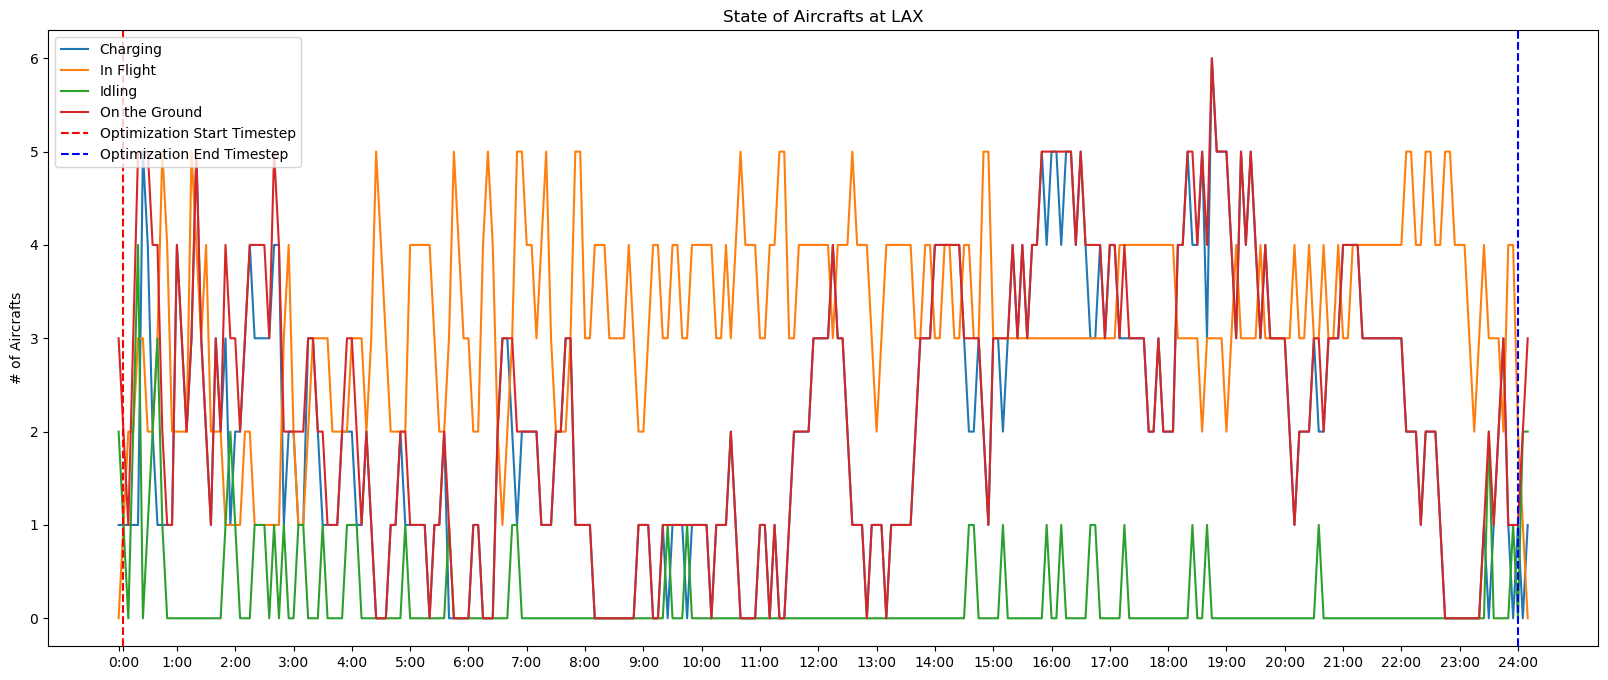

In [9]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(lax_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(lax_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(lax_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((lax_all_c.sum(axis=0)[x0:x1] + lax_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at LAX',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

In [10]:
print('At t = 0, c =', lax_all_c.sum(axis=0)[x0:x1][0], '; u=', lax_all_u.sum(axis=0)[x0:x1][0], '; n=', lax_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', lax_all_c.sum(axis=0)[x0:x1][286], '; u=', lax_all_u.sum(axis=0)[x0:x1][286], '; n=', lax_all_n.sum(axis=0)[x0:x1][286])

At t = 0, c = 1.0 ; u= 0.0 ; n= 2.0
At t = 290, c = 1.0 ; u= 4.0 ; n= 0.0


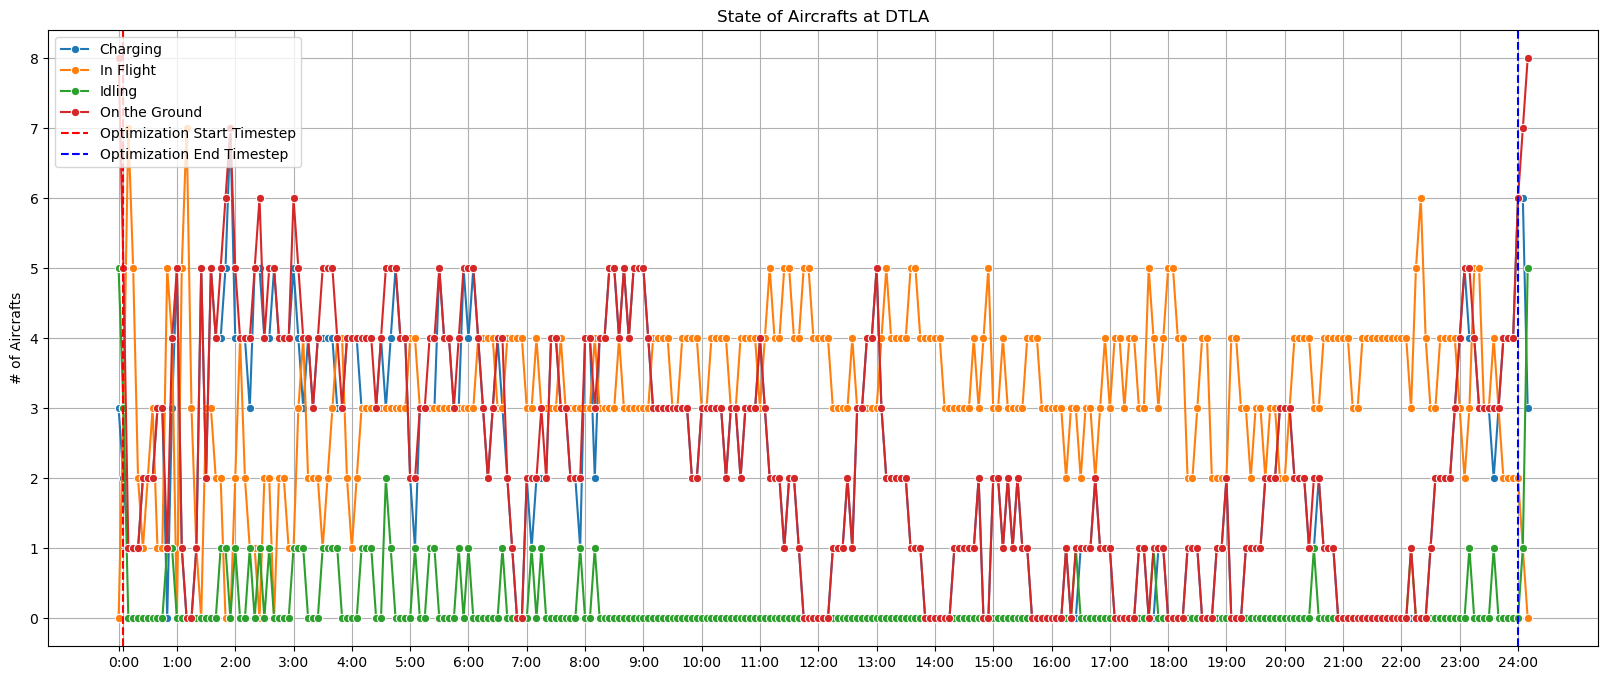

In [11]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(dtla_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax, marker='o')
sns.lineplot(dtla_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax, marker='o')
sns.lineplot(dtla_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax, marker='o')
sns.lineplot((dtla_all_c.sum(axis=0)[x0:x1] + dtla_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax, marker='o')
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at DTLA',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');
plt.grid()

In [12]:
print('At t = 0, c =', dtla_all_c.sum(axis=0)[x0:x1][0], '; u=', dtla_all_u.sum(axis=0)[x0:x1][0], '; n=', dtla_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', dtla_all_c.sum(axis=0)[x0:x1][290], '; u=', dtla_all_u.sum(axis=0)[x0:x1][290], '; n=', dtla_all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 3.0 ; u= 0.0 ; n= 5.0
At t = 290, c = 3.0 ; u= 0.0 ; n= 5.0


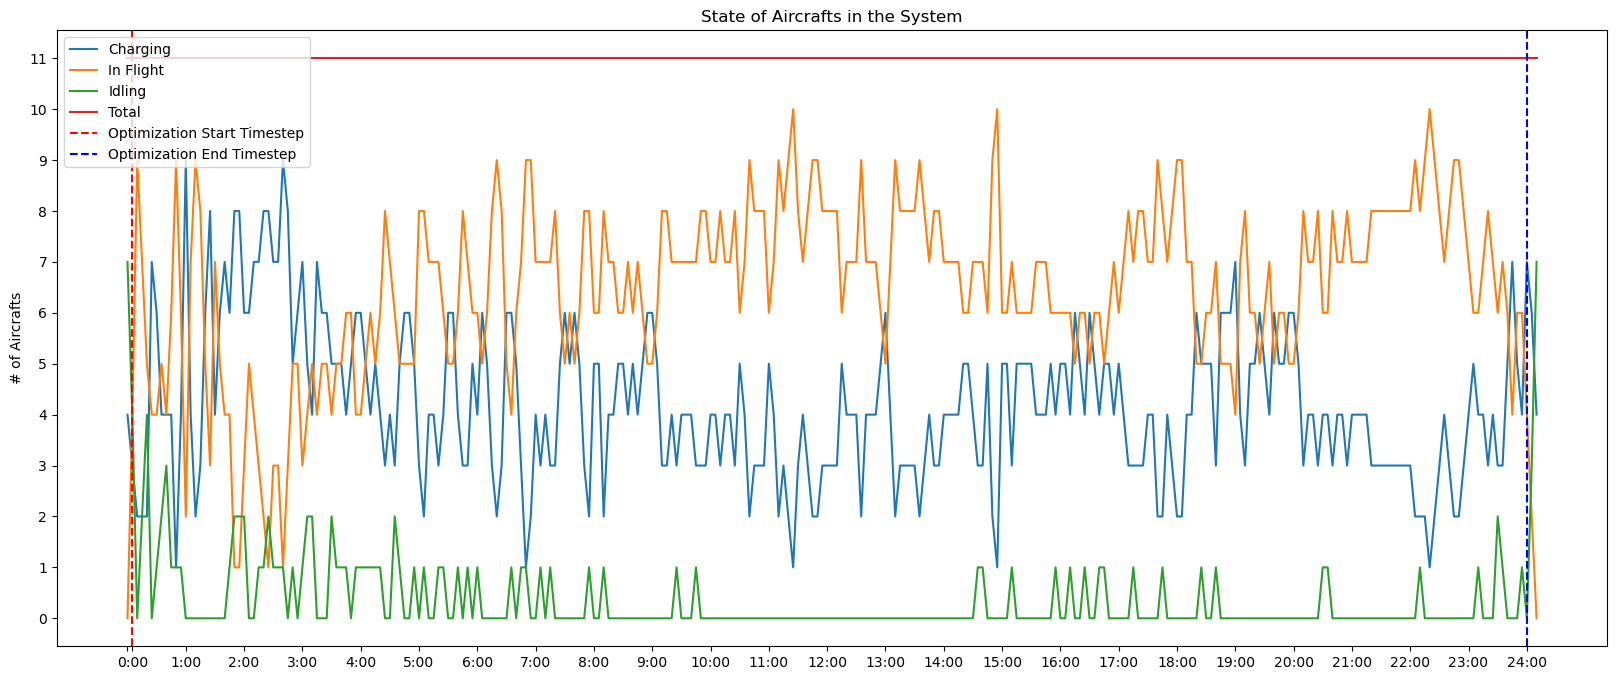

In [13]:
x0=0
x1=291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1]), label='Total', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts in the System',
       ylabel='# of Aircrafts',
       yticks=np.arange(0, (all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1])[0]+1),
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');
# plt.xlim([0, 10])

In [14]:
print('At t = 0, c =', all_c.sum(axis=0)[x0:x1][0], '; u=', all_u.sum(axis=0)[x0:x1][0], '; n=', all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', all_c.sum(axis=0)[x0:x1][290], '; u=', all_u.sum(axis=0)[x0:x1][290], '; n=', all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 4.0 ; u= 0.0 ; n= 7.0
At t = 290, c = 4.0 ; u= 0.0 ; n= 7.0
